In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

datosNY = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
#datosNY.head()

#datosNY.shape
datosNY.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
datosNY.shape

(48895, 16)

In [4]:
datosNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
datosNY.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Viendo el total de valores nulos que hay en este conjunto de datos, se que no me seran importantes, las columnas de id, name, host_id, host_name, last_review, reviews_per_month. Aun con 10000 registros entre  last_review y reviews_per_month no me afecta en nada.

In [6]:
datosNY[datosNY['last_review'].isnull()].head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


In [7]:
datosNY['name'].duplicated().sum()

np.int64(989)

#### Elimino los valores duplicador 

In [8]:
datosNY.drop("name", axis = 1).duplicated().sum()
datosNY.drop("host_id", axis = 1).duplicated().sum()
datosNY.drop("id", axis = 1).duplicated().sum()

np.int64(0)

Asi que elimino estos campos incluyendo latitud y longitud, no me sirven para calcular cosas.

#### Elimino esas columnas porque no me van a hacer falta, la longitud y latitud no me sirve de nada, hay host y nombre duplicados y los ids no me sirven de nada, muchos registros de reviews nulas y no sirve, los elimino porque no me ayudaran. 

In [9]:
datosNY.drop(["reviews_per_month", "name","last_review","id","host_name","host_id","latitude","longitude"], axis = 1, inplace = True)
datosNY.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [10]:
datosNY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
 7   availability_365                48895 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.0+ MB


Ahora mismo en esta primera visualizacion de datos, mostraria asi.

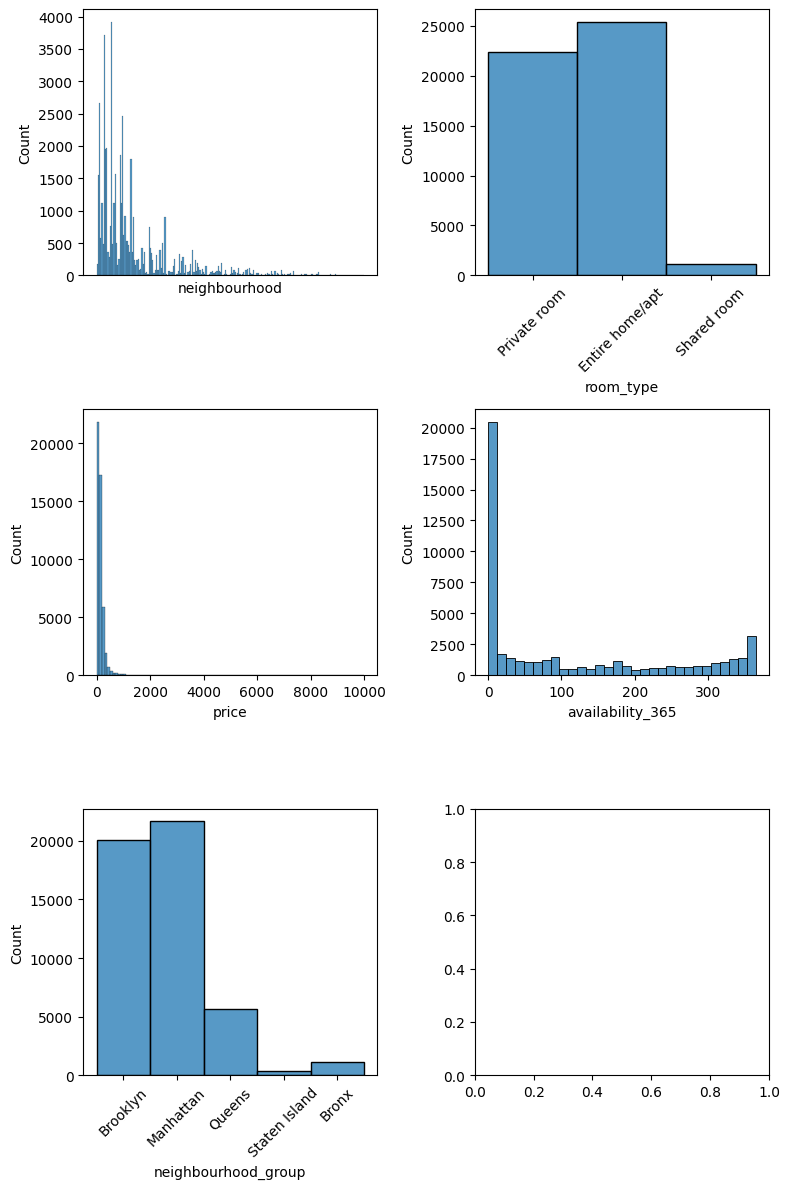

In [11]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 2, figsize = (8, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datosNY, x = "neighbourhood",bins=100).set_xticks([])
sns.histplot(ax = axis[0, 1], data = datosNY, x = "room_type")
axis[0, 1].tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1, 0], data = datosNY, x = "price",bins=100)
sns.histplot(ax = axis[1, 1], data = datosNY, x = "availability_365")
sns.histplot(ax = axis[2, 0], data = datosNY, x = "neighbourhood_group")
axis[2 ,0].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Mostrar el plot
plt.show()

In [12]:
#datosNY.dropna(inplace=True)
datosNY.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
datosNY.shape

(48895, 8)

In [14]:
datosNY.duplicated().sum()

np.int64(1668)

In [16]:
filtro = (
    (datosNY['price'] < 1000) &
    (datosNY['minimum_nights'] < 10) &
    (datosNY['number_of_reviews'] < 310) &
    (datosNY['calculated_host_listings_count'] < 30)
)
dm_copia = datosNY[filtro].copy()

# Mostrar información del DataFrame resultante
dm_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41069 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             41069 non-null  object
 1   neighbourhood                   41069 non-null  object
 2   room_type                       41069 non-null  object
 3   price                           41069 non-null  int64 
 4   minimum_nights                  41069 non-null  int64 
 5   number_of_reviews               41069 non-null  int64 
 6   calculated_host_listings_count  41069 non-null  int64 
 7   availability_365                41069 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 2.8+ MB


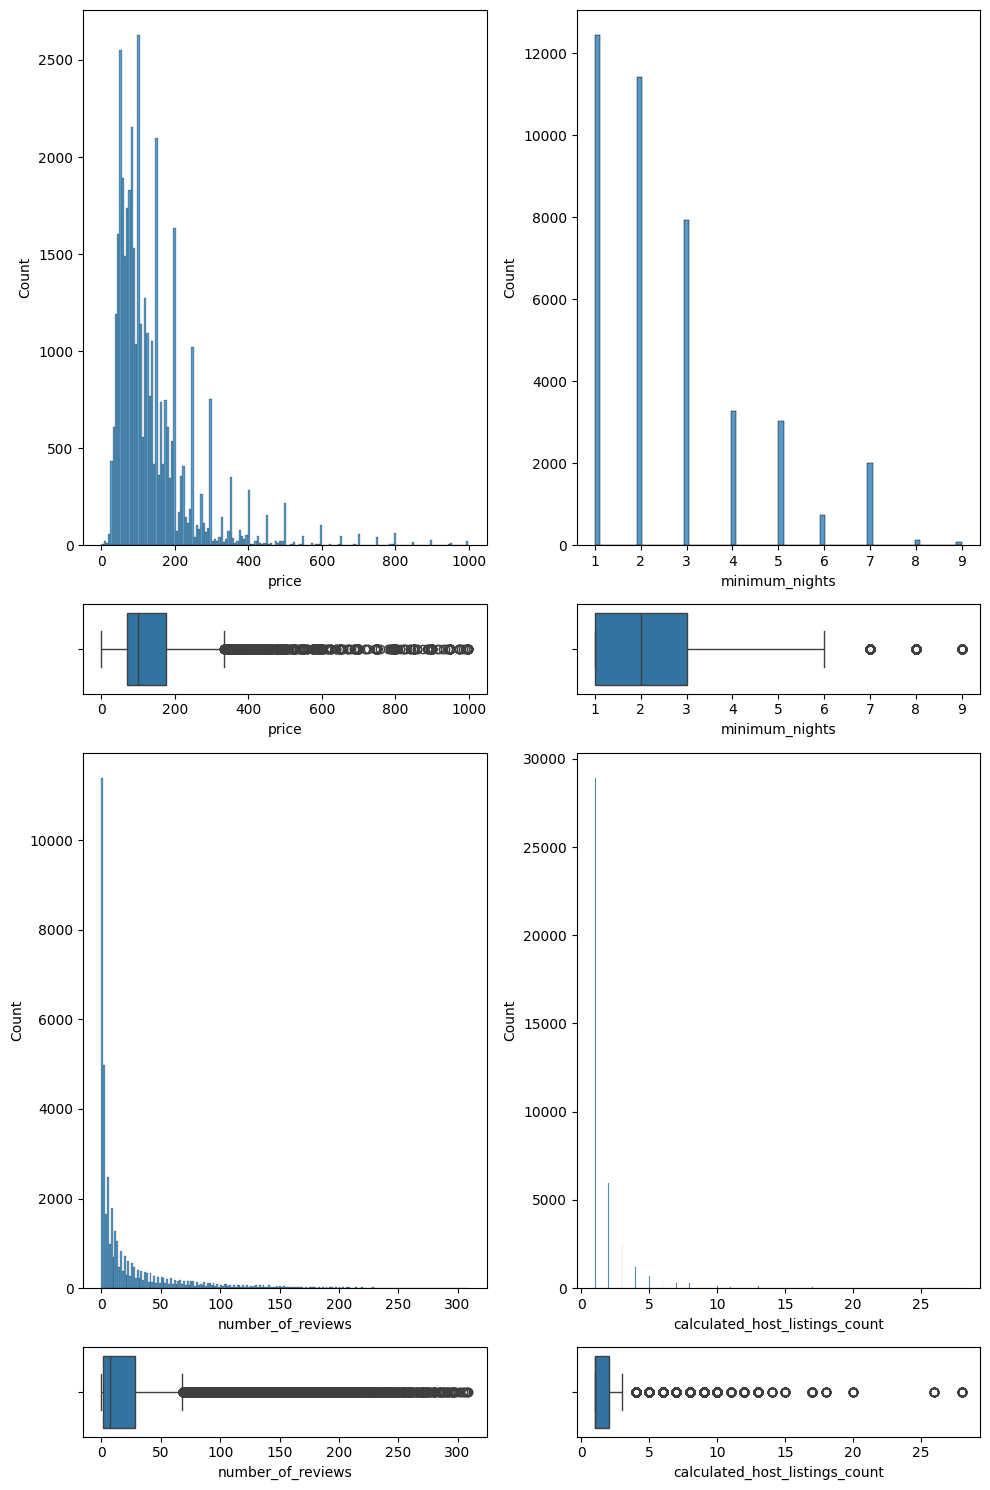

In [18]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

sns.histplot(ax = axis[0, 0], data = dm_copia, x = "price")
sns.boxplot(ax = axis[1, 0], data = dm_copia, x = "price")
sns.histplot(ax = axis[0, 1], data = dm_copia, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = dm_copia, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = dm_copia, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = dm_copia, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = dm_copia, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = dm_copia, x = "calculated_host_listings_count")

plt.tight_layout()

plt.show()

Revisando los datos, he podido ver limitando estos datos para ver una visualizacion mas clara, he despreciado solo 15% de los datos, por la parte mas larga, y aun asi creo que refleja bien este conjunto de datos. 

In [19]:
print(f"Calculando con los outliers he visto que los precios lo puedo limitar a mostrar a menos de 1000$ no mostraria menos 300 resgistros y con eso limite tengo: {len(dm_copia['price'])} registros")

Calculando con los outliers he visto que los precios lo puedo limitar a mostrar a menos de 1000$ no mostraria menos 300 resgistros y con eso limite tengo: 41069 registros


In [20]:
print(f"Quitando reviews nulas o con un total de mas 310 reviews son: {len(dm_copia['number_of_reviews'])} registros")

Quitando reviews nulas o con un total de mas 310 reviews son: 41069 registros


In [21]:
print(f"Es similar a precio, viendo una media de datos de noches, he visto bien poner un limite de 10 noches, con {len(dm_copia['minimum_nights'])} registros")

Es similar a precio, viendo una media de datos de noches, he visto bien poner un limite de 10 noches, con 41069 registros


In [ ]:
print(f"Viendo el registro total de precio, y mirando el precio, he visto razonable poner un limite de 1000. Para mostrar una vision de la grafica de precios mas claro y muestro con: {len(dm_copia['price'])} registros y obviar menos de 7000 nulos o superiores a esa cantidad ")

Viendo el registro total de precio, y mirando el precio, he visto razonable poner un limite de 1000. Para mostrar una vision de la grafica de precios mas claro y muestro con: 41069 registros y obviar menos de 500 nulos o superiores a esa cantidad 


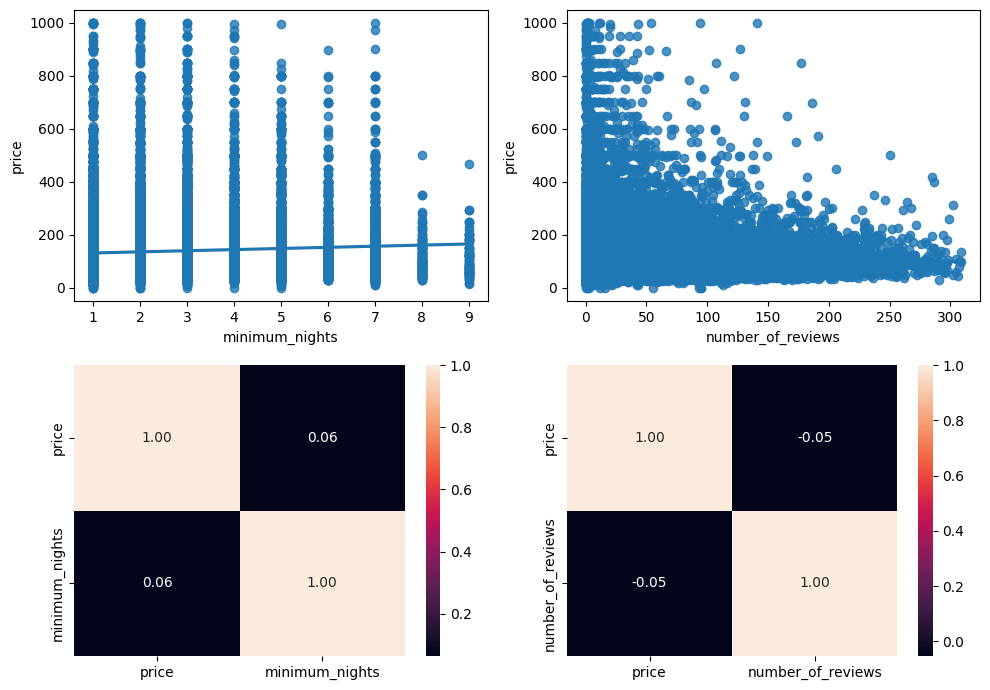

In [25]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = dm_copia, x = "minimum_nights", y = "price")
sns.heatmap(dm_copia[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True)

sns.regplot(ax = axis[0,1], data = dm_copia, x = "number_of_reviews", y = "price")
sns.heatmap(dm_copia[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = True)

plt.tight_layout()

plt.show()

In [ ]:
datosNY.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

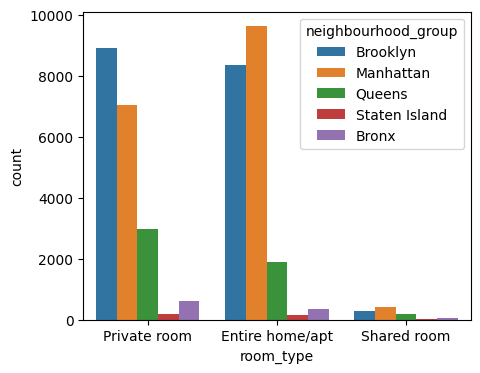

In [27]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = dm_copia, x = "room_type", hue = "neighbourhood_group")

plt.show()

In [ ]:
datosNY.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
datosNY.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [28]:
cont_names = [ 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']
cat_names = ['neighbourhood_group', 'neighbourhood', 'room_type']
y_name = 'price'

dm_copia["neighbourhood_group_n"] = pd.factorize(dm_copia["neighbourhood_group"])[0]
dm_copia["room_type_n"] = pd.factorize(dm_copia["room_type"])[0]
dm_copia["neighbourhood_n"] = pd.factorize(dm_copia["neighbourhood"])[0]

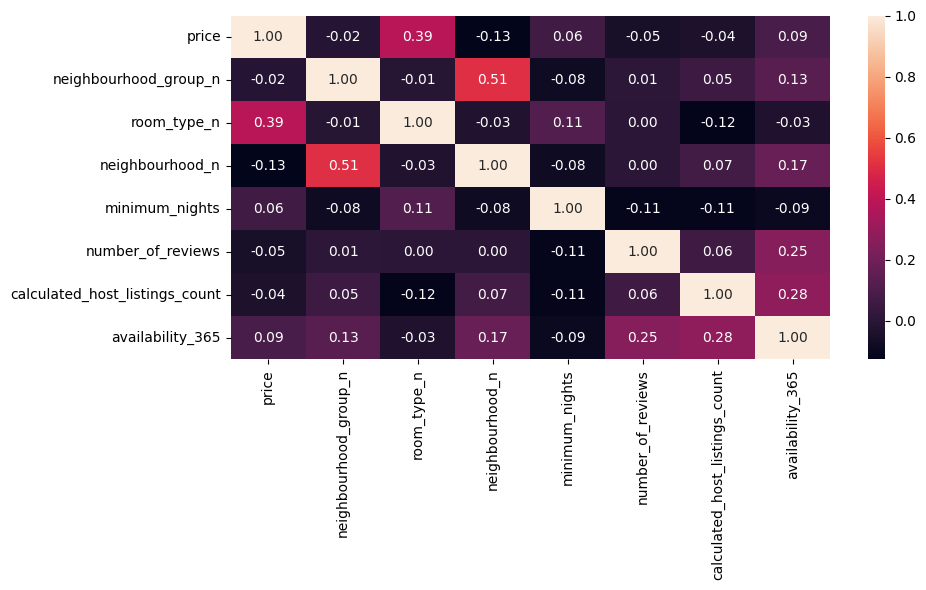

In [29]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dm_copia[['price','neighbourhood_group_n','room_type_n','neighbourhood_n',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [30]:
from sklearn.model_selection import train_test_split

num_variables = ['neighbourhood_group_n','room_type_n','neighbourhood_n',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']

X = dm_copia.drop("price", axis = 1)[num_variables]
y = dm_copia["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
44727,1,0,13,3,4,6,90
9907,0,0,94,7,2,1,32
8387,2,1,46,4,2,1,0
29097,0,1,113,4,87,1,4
46191,2,2,157,1,1,8,343


In [31]:
from sklearn.preprocessing import StandardScaler

cols_a_estandarizar = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

scaler = StandardScaler()
scaler.fit(X_train)

X_train[cols_a_estandarizar] = scaler.fit_transform(X_train[cols_a_estandarizar])
X_test[cols_a_estandarizar] = scaler.transform(X_test[cols_a_estandarizar])

X_train.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
44727,1,0,13,0.225837,-0.490992,2.063693,-0.070448
9907,0,0,94,2.604574,-0.537853,-0.388890,-0.534151
8387,2,1,46,0.820521,-0.537853,-0.388890,-0.789987
29097,0,1,113,0.820521,1.453734,-0.388890,-0.758007
46191,2,2,157,-0.963532,-0.561284,3.044727,1.952255


In [32]:
from sklearn.preprocessing import MinMaxScaler

cols_a_estandarizar = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train[cols_a_estandarizar] = scaler.fit_transform(X_train[cols_a_estandarizar])
X_test[cols_a_estandarizar] = scaler.transform(X_test[cols_a_estandarizar])

X_train.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
44727,1,0,13,0.250,0.012945,0.185185,0.246575
9907,0,0,94,0.750,0.006472,0.000000,0.087671
8387,2,1,46,0.375,0.006472,0.000000,0.000000
29097,0,1,113,0.375,0.281553,0.000000,0.010959
46191,2,2,157,0.000,0.003236,0.259259,0.939726


In [33]:
from sklearn.feature_selection import f_classif, SelectKBest

# Con un valor de k = 5 decimos implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,neighbourhood_group_n,room_type_n,neighbourhood_n,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1.0,0.0,13.0,0.250,0.012945,0.185185,0.246575
1,0.0,0.0,94.0,0.750,0.006472,0.000000,0.087671
2,2.0,1.0,46.0,0.375,0.006472,0.000000,0.000000
3,0.0,1.0,113.0,0.375,0.281553,0.000000,0.010959
4,2.0,2.0,157.0,0.000,0.003236,0.259259,0.939726
